In [3]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

In [5]:
import cv2 as cv

imgc = cv.imread(path + "rayo.png")
img = cv.cvtColor(imgc, cv.COLOR_BGR2GRAY)
ret,th = cv.threshold(img,127,255,0)

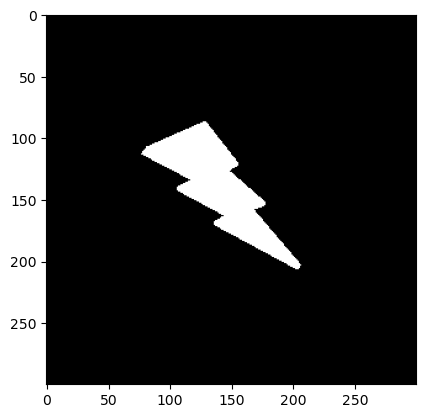

In [9]:
from matplotlib import pyplot as plt


plt.imshow(th,cmap="gray")

# **SACAR LOS BORDES DE UNA IMAGEN**

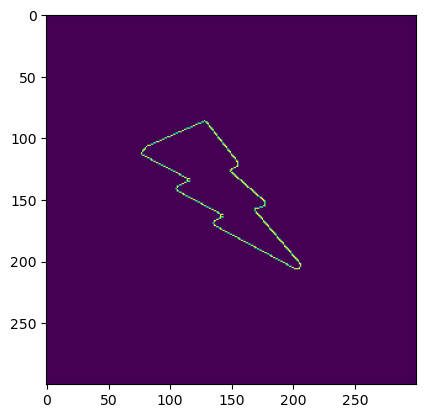

In [16]:
umbral_min=50
umbral_max=100
cn = cv.Canny(th,umbral_min,umbral_max)
plt.imshow(cn)

1
Centro: X:139 Y:139


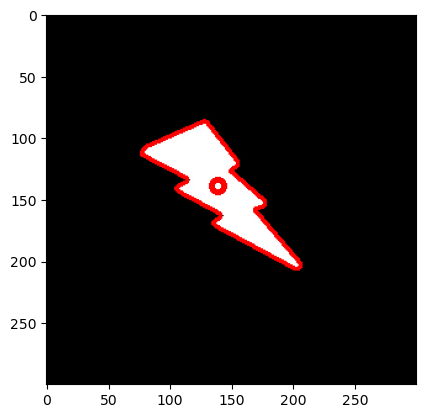

In [56]:
contornos, jerarquia = cv.findContours(cn.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
# Número de contornos de la imagen
print(len(contornos))
cnt = contornos[0]
# Momentos del contorno, que nos sirve para hayar el centro
M = cv.moments(cnt)

if M['m00']:
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(f"Centro: X:{cx} Y:{cy}")
    # Dibujar el centro de la imagen
    cv.circle(imgc, (cx, cy), 5, (255, 0, 0), 3)

cv.drawContours(imgc,[cnt],-1,(255,0,0),1)
plt.imshow(imgc)
